In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm

In [ ]:
# Loading the dataframes we'll be using

# Contains the DEPENDENT variables relating to language PAIRS
lang_pair_dv = pd.read_csv('/Data/Bible experimental vars/bible_dependent_vars_LANGUAGE_PAIR.csv')

# Contains the INDEPENDENT variables relating to language PAIRS
lang_pair_iv = pd.read_csv('/Data/Bible experimental vars/bible_predictors_LANGUAGE_PAIR.csv')

# Contains ALL variables relating to INDIVIDUAL languages
indiv_lang_vars = pd.read_csv('/Data/Bible experimental vars/bible_all_features_LANGUAGE.csv')

In [ ]:
# It's pretty helpful to combine the IVs and DVs for language pairs,
# as Pingouin prefers to work with single dataframe objects
master_pair = pd.concat([lang_pair_iv, lang_pair_dv], axis=1)

In [ ]:
# All the possible pair-centric LaBSE IVs
labse_pair_dv = ['F1-score (LaBSE, average)', 'Gromov-Hausdorff dist. (LaBSE, average)', 'Singular value gap (LaBSE, average)',
                 'ECOND-HM (LaBSE, average)', 'Average margin score (LaBSE, average)']
X_pair_labse = master_pair[labse_pair_dv]

In [ ]:
# Repeating the same process for LASER

# All the possible pair-centric LASER IVs
laser_pair_dv = ['F1-score (LASER, average)', 'Gromov-Hausdorff dist. (LASER, average)', 'Singular value gap (LASER, average)',
                 'ECOND-HM (LASER, average)', 'Average margin score (LASER, average)']
X_pair_laser = master_pair[laser_pair_dv]

In [ ]:
labse_pca = PCA(n_components=5).fit_transform(X_pair_labse)
laser_pca = PCA(n_components=5).fit_transform(X_pair_laser)

In [ ]:
labse_tsne = TSNE(n_iter=10000, perplexity=250).fit_transform(labse_pca)
laser_tsne = TSNE(n_iter=10000, perplexity=250).fit_transform(laser_pca)

In [ ]:
same_word_order = master_pair['Same Word Order?']
same_poly_status = master_pair['Same Polysynthesis Status?']
same_family = master_pair['Same Family?']
same_genus = master_pair['Same Genus?']

Text(0, 0.5, 'Language pair DVs - TSNE - LaBSE - dim2')

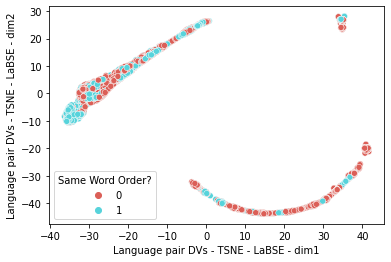

In [ ]:
sns.scatterplot(x=laser_tsne[:,0], 
                y=laser_tsne[:,1],
                hue=same_word_order,
                palette=sns.color_palette('hls', 2),
                legend='full')
plt.xlabel('Language pair DVs - TSNE - LaBSE - dim1')
plt.ylabel('Language pair DVs - TSNE - LaBSE - dim2')

Text(0, 0.5, 'Language pair DVs - TSNE - LaBSE - dim2')

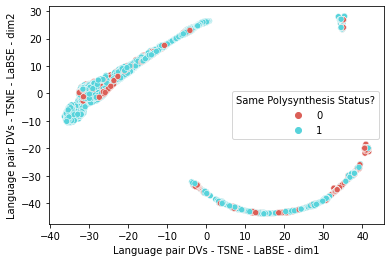

In [ ]:
sns.scatterplot(x=laser_tsne[:,0], 
                y=laser_tsne[:,1],
                hue=same_poly_status,
                palette=sns.color_palette('hls', 2),
                legend='full')
plt.xlabel('Language pair DVs - TSNE - LaBSE - dim1')
plt.ylabel('Language pair DVs - TSNE - LaBSE - dim2')

Text(0, 0.5, 'Language pair DVs - TSNE - LASER - dim2')

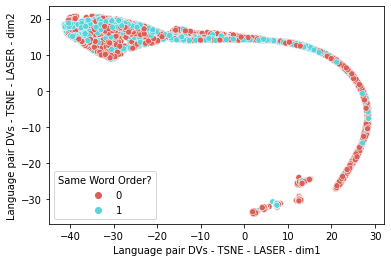

In [ ]:
sns.scatterplot(x=labse_tsne[:,0], 
                y=labse_tsne[:,1],
                hue=same_word_order,
                palette=sns.color_palette('hls', 2),
                legend='full')
plt.xlabel('Language pair DVs - TSNE - LASER - dim1')
plt.ylabel('Language pair DVs - TSNE - LASER - dim2')

Text(0, 0.5, 'Language pair DVs - TSNE - LASER - dim2')

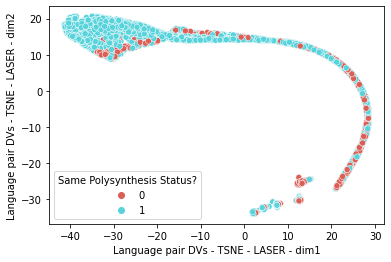

In [ ]:
sns.scatterplot(x=labse_tsne[:,0], 
                y=labse_tsne[:,1],
                hue=same_poly_status,
                palette=sns.color_palette('hls', 2),
                legend='auto')
plt.xlabel('Language pair DVs - TSNE - LASER - dim1')
plt.ylabel('Language pair DVs - TSNE - LASER - dim2')